# Problem Statement 
### Building a Multiple linear Regression Model to predict the demand of Shared bike with in a region 
- BoomBikes, a US-based bike-sharing provider, has faced significant revenue losses due to the COVID-19 pandemic. To address these challenges and prepare for a post-lockdown recovery, the company aims to create a strategic business plan to accelerate revenue growth as the economy improves. They are particularly interested in understanding the factors influencing the demand for shared bikes in the American market after quarantine restrictions end.

 - BoomBikes has hired a consulting firm to analyze a dataset that includes daily bike demand data, considering various factors such as weather conditions and user behavior. The company seeks to identify which variables significantly impact bike demand and how well these factors explain the fluctuations in usage. The insights gained from this analysis will help BoomBikes better cater to customer needs, differentiate itself from competitors, and achieve profitability.

### ___Step 1 : Importing the required Library___


In [3]:
# For Data managment and Adjustment
import numpy as np
import pandas as pd

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data and Time 
from datetime import datetime as dt 

# To Prevent copy error for being seen 
import warnings
warnings.filterwarnings('ignore')

# For building a Model and Predictions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### ___Step 2 : Reading Data___

In [5]:
bikes = pd.read_csv('day.csv', low_memory = True, )

In [6]:
bikes.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


In [7]:
bikes.shape

(730, 16)

In [8]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
# Unique values present in the DataFrame
bikes.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [11]:
# Having a list of column names present in the dataframe for easy access later on.
df_columns = bikes.columns.tolist()
print(df_columns)

['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


#### ___Step 2.1 : Segmenting the data for easy Handeling___

___Removing Date Time Variables and instant variable___

In [14]:
# Remove unnecessary instant column
bikes.drop('instant', axis = 1, inplace = True)

In [15]:
# Remove unnecessary date column
bikes.drop('dteday', axis = 1, inplace = True)

In [16]:
df = bikes

In [17]:
df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


___Categorical Variables___

In [19]:
# Converting the object category into a categorical dtype.
cat_columns = ['mnth','season', 'yr', 'holiday', 'weekday','workingday', 'weathersit']
df[cat_columns] = df[cat_columns].astype('category')
df[cat_columns].nunique()

mnth          12
season         4
yr             2
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

- The columns (yr, holiday, workingday) present in the Dataframe which has only two variable 0 or 1 represneting Yes or No will not be considered for Dummy variable. 

___Numerical Variables___

In [22]:
# Writing a function to Converting the object category into a numerical dtype.
def get_numeric_columns(df):
    """
    Returns a list of column names with float64 or int64 data types from the given DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    list: A list of column names with numeric data types.
    """
    return df.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [23]:
num_columns = get_numeric_columns(df)
num_columns

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

### ___Step 3: Vizualizing the Data___

- Visualization of numerical values using a scatter plot to identify a linear pattern.

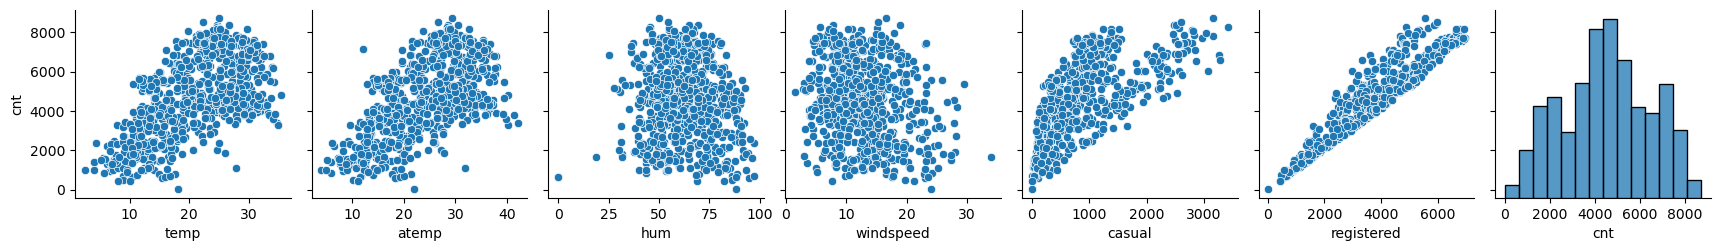

In [26]:
sns.pairplot(df, x_vars = num_columns,  y_vars = 'cnt')
plt.show()

    - Both humidity and wind speed do not exhibit a strong linear relationship. 
    - Although we can fit a line, the predictive power may not be very strong.
    - Temp and atemp are the same 

- For Categorical Variables Boxplot

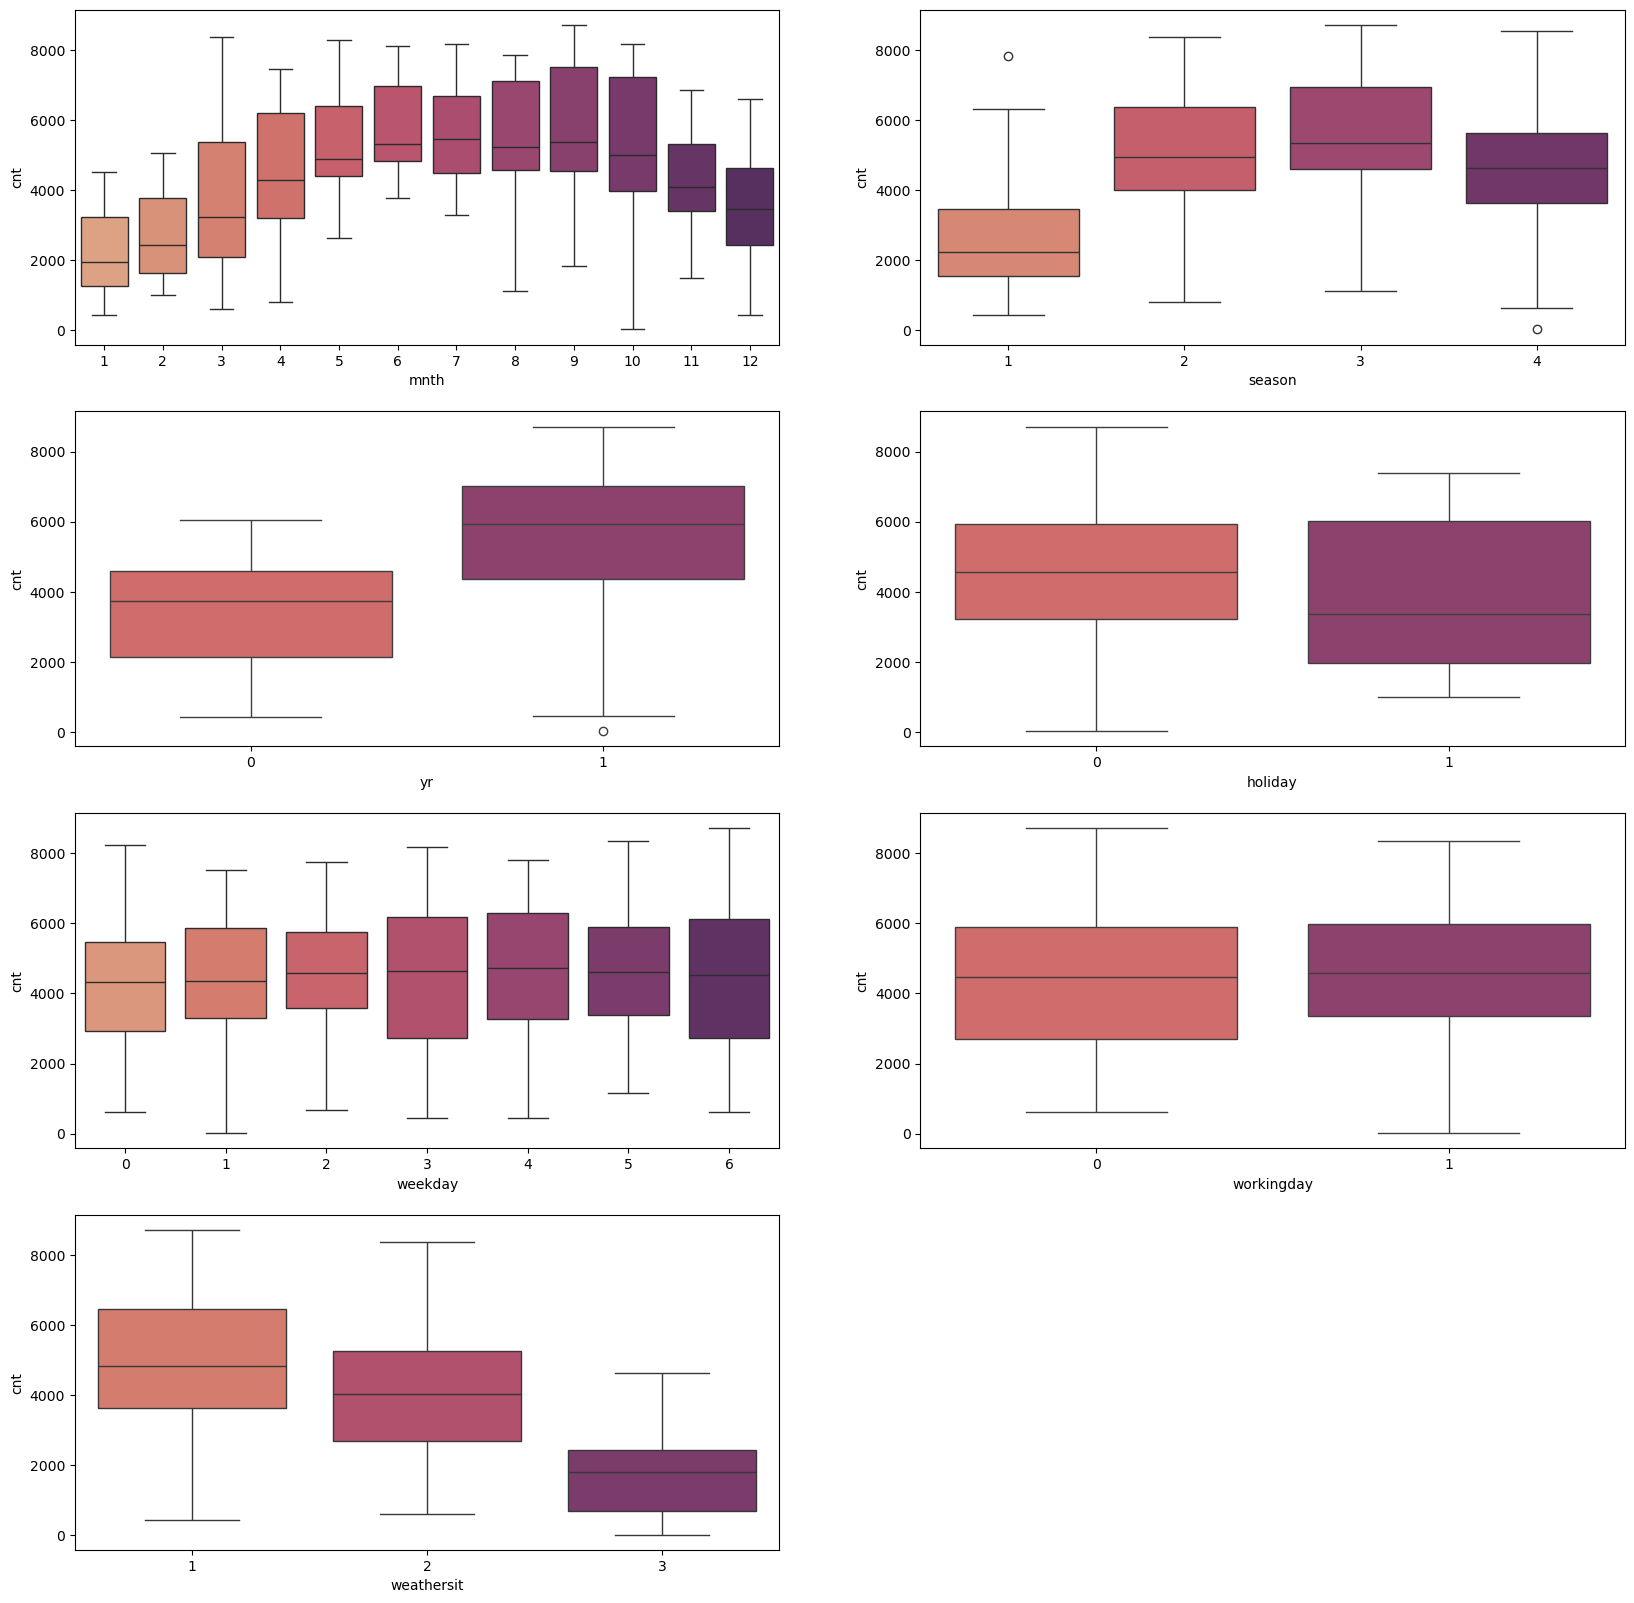

In [29]:
#cat_columns = ['mnth','season', 'yr', 'holiday', 'weekday','workingday', 'weathersit']

# Boxplots for categorical variables
plt.figure(figsize=(20, 20))
for i, col in enumerate(cat_columns):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(data=bikes, x= col, y='cnt', palette = 'flare')
plt.show()

- Weekday:
    - There seems to be some variation in the median count across different weekdays, but it's less pronounced.
    - Weekday could still be included in the model, but it may have a weaker predictive power compared to other features.

- For the regression model:
    - Categorical variables like season, weathersit, month, weekday, etc., should be one-hot encoded or treated as categorical variables.
    - Interaction terms (such as season:workingday) might also be worth exploring.

### ___Step 4 : Preparing the data for modeling___

In [32]:
df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349


#### ___Step 4.1 : Getting Dummy Variables for the Categorical Variables___

In [34]:
df_dummies = pd.get_dummies(df[['mnth','season', 'weekday', 'weathersit']], drop_first=True).astype('int')
df_dummies.nunique()

mnth_2          2
mnth_3          2
mnth_4          2
mnth_5          2
mnth_6          2
mnth_7          2
mnth_8          2
mnth_9          2
mnth_10         2
mnth_11         2
mnth_12         2
season_2        2
season_3        2
season_4        2
weekday_1       2
weekday_2       2
weekday_3       2
weekday_4       2
weekday_5       2
weekday_6       2
weathersit_2    2
weathersit_3    2
dtype: int64

In [35]:
dummy_cols = df_dummies.columns.tolist()
print(dummy_cols)

['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'season_2', 'season_3', 'season_4', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3']


In [36]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [37]:
df_wd = pd.concat([df, df_dummies], axis = 1)
df_wd.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0


In [38]:
df_f = df_wd.drop(['mnth','season', 'weekday', 'weathersit'], axis = 1)

In [39]:
df_f.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,1,0,0,0,0,0


In [40]:
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   yr            730 non-null    category
 1   holiday       730 non-null    category
 2   workingday    730 non-null    category
 3   temp          730 non-null    float64 
 4   atemp         730 non-null    float64 
 5   hum           730 non-null    float64 
 6   windspeed     730 non-null    float64 
 7   casual        730 non-null    int64   
 8   registered    730 non-null    int64   
 9   cnt           730 non-null    int64   
 10  mnth_2        730 non-null    int32   
 11  mnth_3        730 non-null    int32   
 12  mnth_4        730 non-null    int32   
 13  mnth_5        730 non-null    int32   
 14  mnth_6        730 non-null    int32   
 15  mnth_7        730 non-null    int32   
 16  mnth_8        730 non-null    int32   
 17  mnth_9        730 non-null    int32   
 18  mnth_10   

#### ___Step 4.2 : Spliting data Set into Train Test Split___

In [42]:
df_train, df_test = train_test_split(df_f, train_size = 0.7, test_size = 0.3, random_state = 100)
print('Main DataFrame  - ',df_f.shape)
print('Train DataFrame - ',df_train.shape)
print('Test DataFrame  - ',df_test.shape)

Main DataFrame  -  (730, 32)
Train DataFrame -  (510, 32)
Test DataFrame  -  (219, 32)


In [43]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,922,6612,7534,...,0,1,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,968,6248,7216,...,1,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,956,3110,4066,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,364,1432,1796,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,1120,3100,4220,...,0,0,0,0,0,0,0,1,1,0


#### ___Step 4.3 : Scaling with Min Max Scaling for Numerical Columns___

In [45]:
### Scaling with Min Max Scaling 
scaler = MinMaxScaler()

In [46]:
num_columns

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [47]:
df_train[num_columns].head(3)

,temp,atemp,hum,windspeed,casual,registered,cnt
653,19.201653,23.0423,55.8333,12.208807,922,6612,7534
576,29.246653,33.1448,70.4167,11.083475,968,6248,7216
426,16.980847,20.6746,62.1250,10.792293,956,3110,4066


In [48]:
df_train[num_columns] = scaler.fit_transform(df_train[num_columns])

In [49]:
df_train[num_columns].head(3)

,temp,atemp,hum,windspeed,casual,registered,cnt
653,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243
576,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255


#### ___Step 4.4 : Visualizing the correlation using a heat map.___

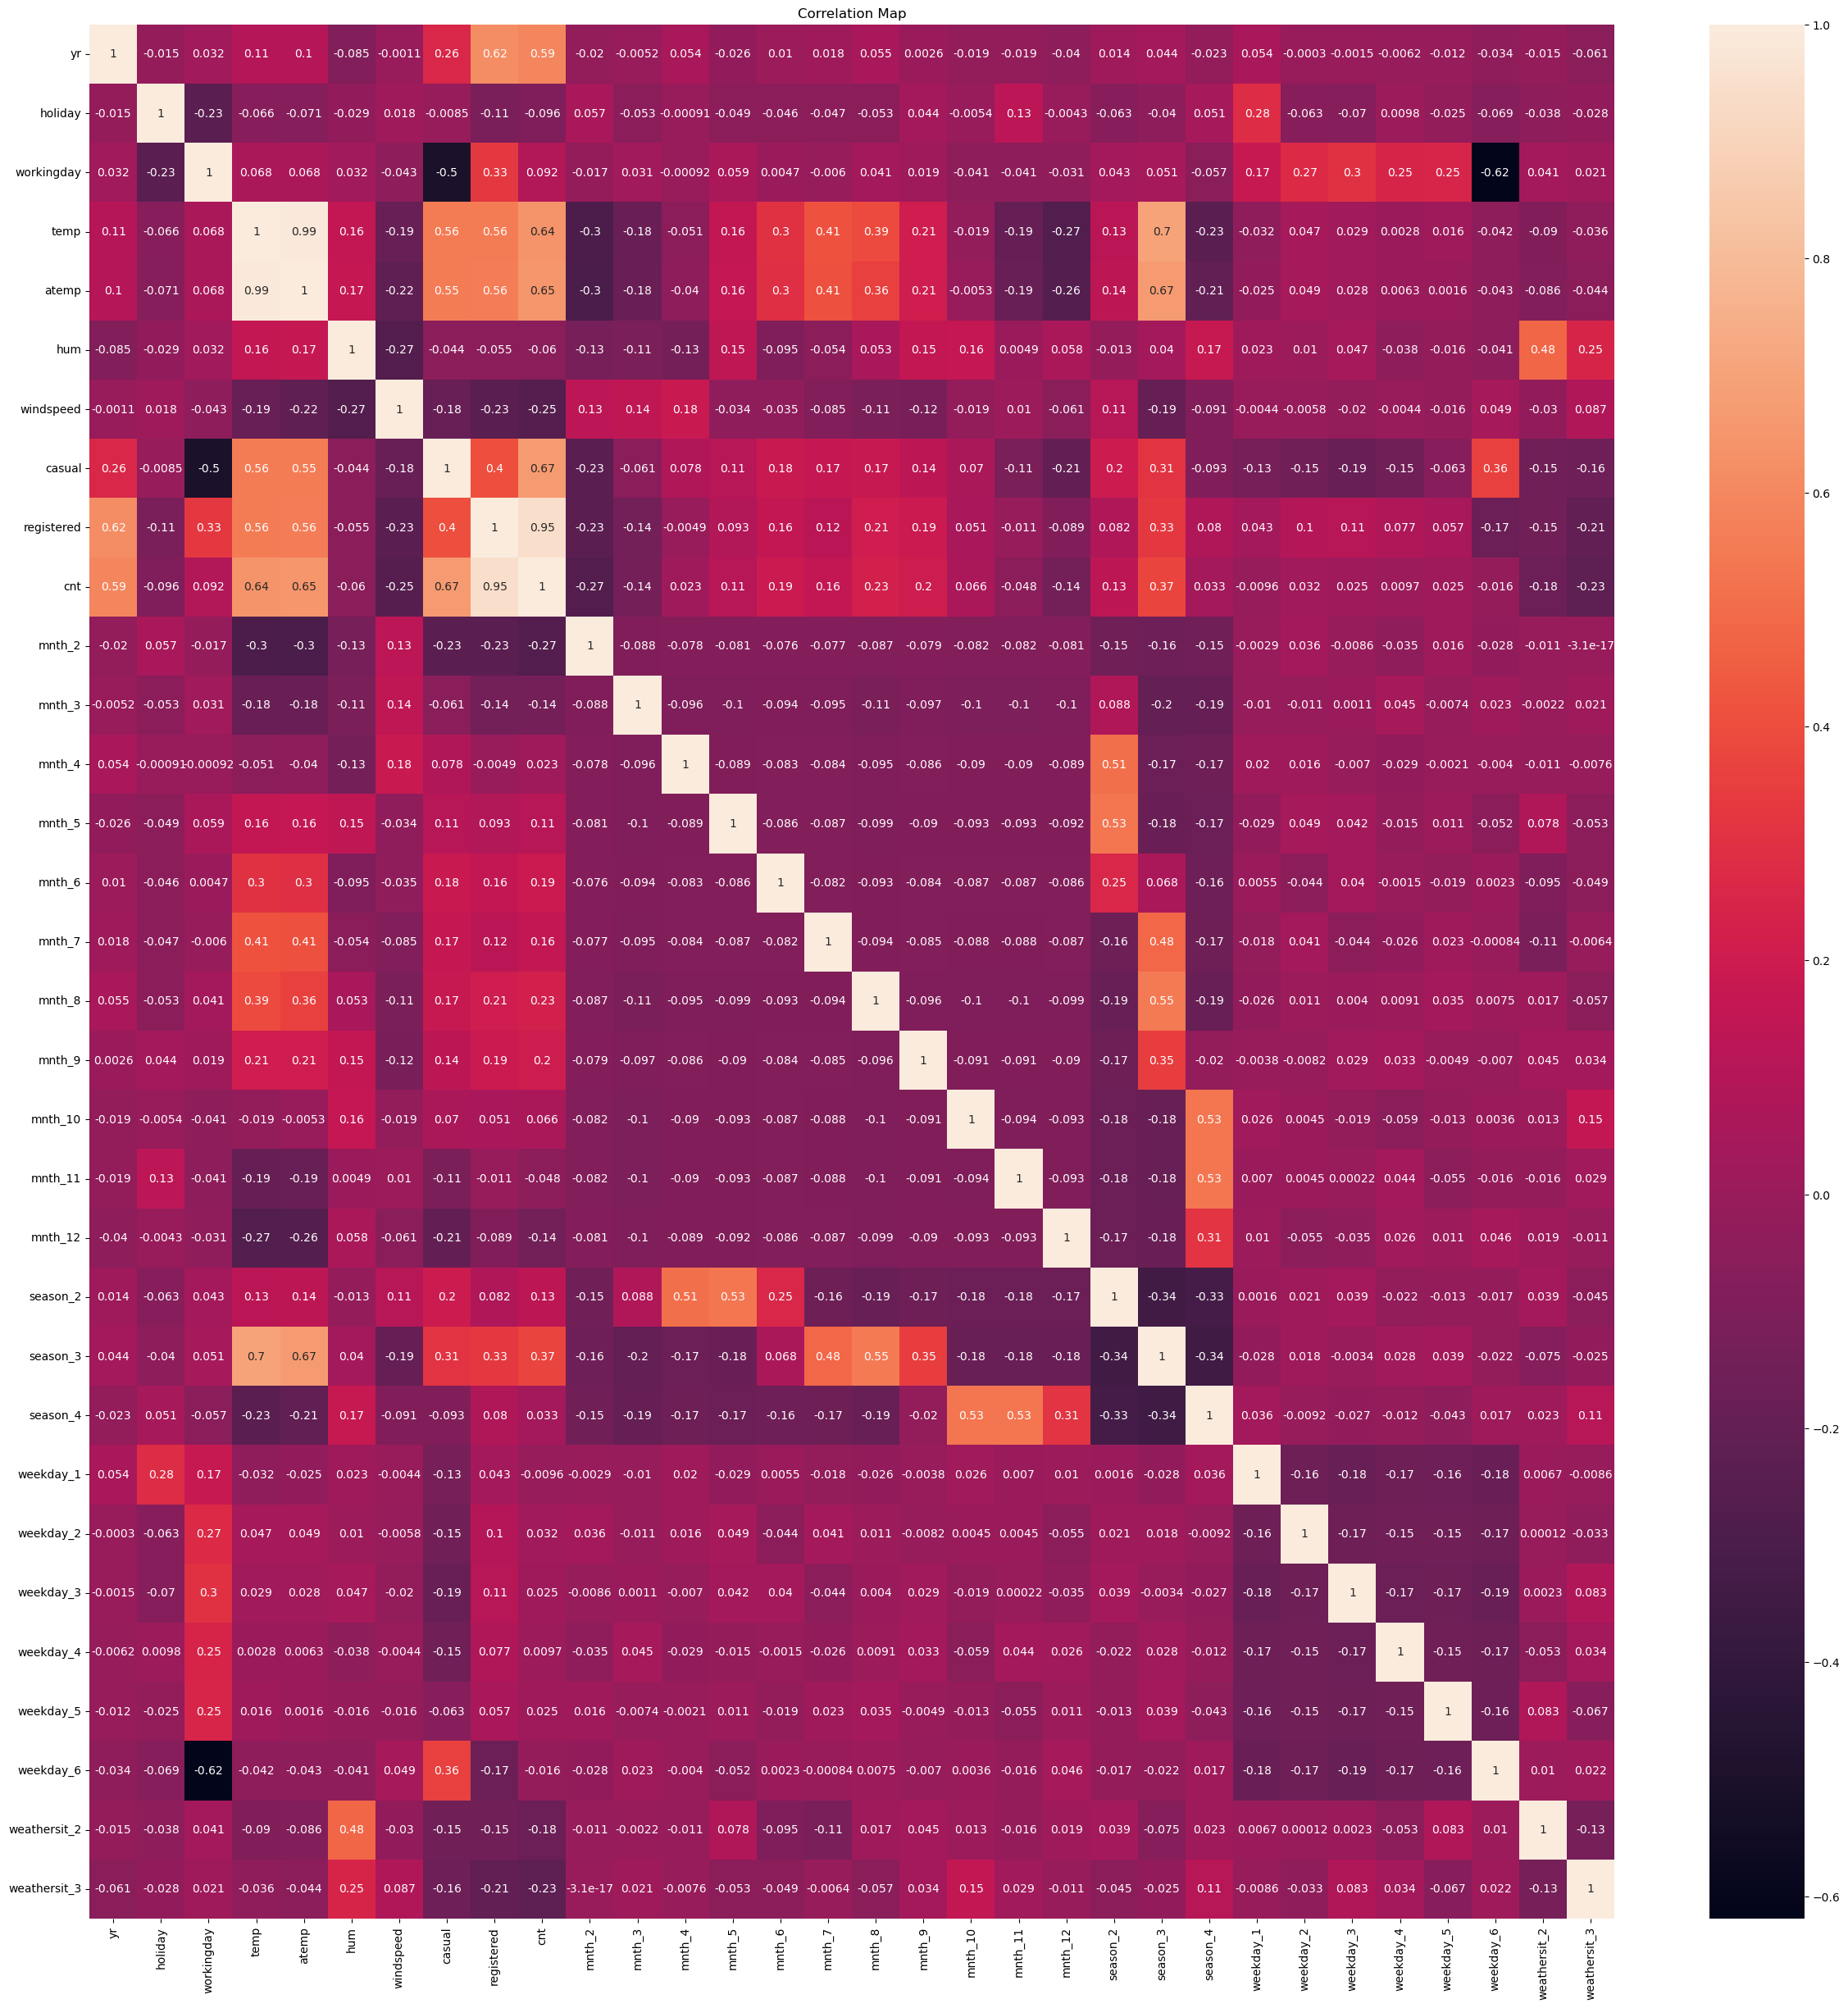

In [51]:
plt.figure(figsize = (30,30))

# Compute the correlation matrix
corr_matrix = df_train.corr()
sns.heatmap(corr_matrix, annot = True, cbar = True)
plt.title("Correlation Map")
plt.show()

#### ___Correlation matrix___

- We will take a different approach from using the correlation matrix. Instead, we will unstack the upper triangle and identify the top 10 factors with the highest positive correlation with "cnt" as well as the top 20 factors with the strongest negative correlation with "cnt."

In [54]:
# Get the upper triangle of the correlation matrix (to avoid duplicate pairs)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Unstack the upper triangle to get pairs and sort them
top_20_positive_correlations = (upper_triangle.unstack().sort_values(ascending=False).head(20))

top_20_positive_correlations

atemp         temp          0.989537
cnt           registered    0.948361
season_3      temp          0.697524
cnt           casual        0.670830
season_3      atemp         0.669979
cnt           atemp         0.646475
              temp          0.643517
registered    yr            0.620281
cnt           yr            0.591508
registered    atemp         0.561250
              temp          0.557199
casual        temp          0.555811
              atemp         0.554883
season_3      mnth_8        0.546121
season_4      mnth_10       0.533619
              mnth_11       0.533619
season_2      mnth_5        0.532539
              mnth_4        0.511984
season_3      mnth_7        0.482018
weathersit_2  hum           0.481042
dtype: float64

In [55]:
# Get the upper triangle of the correlation matrix (to avoid duplicate pairs)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Unstack the upper triangle to get pairs and sort them in ascending order
top_20_negative_correlations = (upper_triangle.unstack().dropna().sort_values().head(20))

top_20_negative_correlations

weekday_6     workingday   -0.619074
casual        workingday   -0.503783
season_4      season_3     -0.343764
season_3      season_2     -0.340160
season_4      season_2     -0.328116
mnth_2        atemp        -0.299509
              temp         -0.296021
mnth_12       temp         -0.272869
mnth_2        cnt          -0.270287
windspeed     hum          -0.266895
mnth_12       atemp        -0.261862
cnt           windspeed    -0.253794
registered    windspeed    -0.234840
mnth_2        casual       -0.234209
workingday    holiday      -0.233863
mnth_2        registered   -0.233707
season_4      temp         -0.233697
weathersit_3  cnt          -0.226598
windspeed     atemp        -0.215283
weathersit_3  registered   -0.212057
dtype: float64

#### ___Step 4.5 : Seperating df_f into X_train and y_train___

In [57]:
df_f.shape

(730, 32)

In [58]:
df_f.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,0,0,0,0,0


In [59]:
y_train = df_f.pop('cnt')
X_train = df_f

In [60]:
print(X_train.shape)
print(y_train.shape)

(730, 31)
(730,)


### ___Step 5 : Building a linear model___

#### ___Step 5.1 : Recursive Feature Elimination (RFE)___

- Using the Recursive Feature Elimination (RFE) method for coarse selection, followed by manual handling for fine selection.

In [64]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()

# Fitting the linear regression model to the test dataset 
lm.fit(X_train, y_train)

# RFE Initialization where lm will act as an estimator for the rank of the feature 
rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

- A list of tuples by zipping together the feature names from X_train, a boolean array indicating which features were selected by Recursive Feature Elimination (RFE), and the ranking of each feature (where a rank of 1 indicates the feature was selected).


In [66]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 6),
 ('temp', False, 5),
 ('atemp', True, 1),
 ('hum', False, 16),
 ('windspeed', False, 8),
 ('casual', True, 1),
 ('registered', True, 1),
 ('mnth_2', False, 3),
 ('mnth_3', False, 12),
 ('mnth_4', False, 9),
 ('mnth_5', False, 15),
 ('mnth_6', True, 1),
 ('mnth_7', True, 1),
 ('mnth_8', True, 1),
 ('mnth_9', False, 10),
 ('mnth_10', False, 2),
 ('mnth_11', True, 1),
 ('mnth_12', False, 4),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', False, 7),
 ('weekday_1', True, 1),
 ('weekday_2', False, 14),
 ('weekday_3', True, 1),
 ('weekday_4', False, 11),
 ('weekday_5', False, 17),
 ('weekday_6', True, 1),
 ('weathersit_2', False, 13),
 ('weathersit_3', True, 1)]

In [67]:
# Columns selected by the automated Recursive Feature Elimination (RFE) process.
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'casual', 'registered', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_11', 'season_2', 'season_3', 'weekday_1', 'weekday_3',
       'weekday_6', 'weathersit_3'],
      dtype='object')

In [68]:
# Columns not selected by the automated Recursive Feature Elimination (RFE) process.
X_train.columns[~rfe.support_]

Index(['workingday', 'temp', 'hum', 'windspeed', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_9', 'mnth_10', 'mnth_12', 'season_4', 'weekday_2',
       'weekday_4', 'weekday_5', 'weathersit_2'],
      dtype='object')

In [69]:
X_train_rfe = X_train[col] # X_train_rfe with selected features

#### ___Step 5.2 : Building model using statsmodel, for the detailed statistics___

##### ___Extra : Making a function to calculate the VIF___

In [72]:
def calculate_vif(X):
    """
    Calculates the Variance Inflation Factor (VIF) for each feature in the DataFrame.

    Parameters:
    X (DataFrame): The feature matrix for which to calculate VIF.

    Returns:
    DataFrame: A DataFrame containing features and their corresponding VIF values, sorted by VIF.
    """
    X = X_train_rfe.drop('const',axis =1)
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    
    return vif


Registered and causal when added up will be the total Cnt thus as we know thar the registered user will be a stronger predictor than causal. Will be dropping casual

In [74]:
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.390e+31
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:06:14   Log-Likelihood:                 18860.
No. Observations:                 730   AIC:                        -3.769e+04
Df Residuals:                     714   BIC:                        -3.761e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.832e-13   2.34e-13      2.069   

In [75]:
vif_result = calculate_vif(X_train_rfe)
vif_result

,Features,VIF
2,atemp,22.15
4,registered,22.10
3,casual,5.42
10,season_3,4.94
0,yr,4.21
9,season_2,2.37
6,mnth_7,2.25
7,mnth_8,2.16
13,weekday_6,1.54
5,mnth_6,1.38


- The coefficients for casual and registered are both 1.000, which might indicate perfect multicollinearity or redundancy, dropping one of them.

In [77]:
X_train_rfe.drop(columns =['registered'], inplace = True)

In [78]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_rfe_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     217.0
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          3.40e-246
Time:                        15:06:14   Log-Likelihood:                -5955.1
No. Observations:                 730   AIC:                         1.194e+04
Df Residuals:                     715   BIC:                         1.201e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          208.0317    135.026      1.541   

In [79]:
vif_result = calculate_vif(X_train_rfe)
vif_result

,Features,VIF
2,atemp,8.48
3,casual,5.42
9,season_3,4.94
8,season_2,2.35
5,mnth_7,2.15
6,mnth_8,2.14
0,yr,2.11
12,weekday_6,1.48
4,mnth_6,1.37
10,weekday_1,1.36


- mnth_6 and weekday_1 due to their high p-values.

In [81]:
X_train_rfe.drop(columns =['mnth_6', 'weekday_1'], inplace = True)

In [82]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_rfe_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          6.98e-248
Time:                        15:06:15   Log-Likelihood:                -5956.8
No. Observations:                 730   AIC:                         1.194e+04
Df Residuals:                     717   BIC:                         1.200e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          268.8014    130.181      2.065   

In [83]:
vif_result = calculate_vif(X_train_rfe)
vif_result

,Features,VIF
2,atemp,7.65
3,casual,5.26
8,season_3,4.70
7,season_2,2.26
0,yr,2.09
4,mnth_7,1.99
5,mnth_8,1.99
10,weekday_6,1.47
9,weekday_3,1.24
6,mnth_11,1.19


- season_3 is not statistically significant (p-value = 0.923)

In [85]:
X_train_rfe.drop(columns =['season_3'], inplace = True)
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train,X_train_rfe_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     275.7
Date:                Thu, 31 Oct 2024   Prob (F-statistic):          4.13e-249
Time:                        15:06:15   Log-Likelihood:                -5956.8
No. Observations:                 730   AIC:                         1.194e+04
Df Residuals:                     718   BIC:                         1.199e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          273.0549    122.534      2.228   

#### ___Function to calculate the VIF values___

In [87]:
# Making a function to calculate the VIF values 
def calculate_vif(dataframe):
    """
    Calculate the Variance Inflation Factor (VIF) for each feature in the given dataframe.
    
    Parameters:
        dataframe (pd.DataFrame): The dataframe containing the independent variables.

    Returns:
        pd.DataFrame: A dataframe with VIF values for each feature, sorted in descending order.
    """
    X_train_vif = X_train_rfe.drop(['const'], axis=1)
    vif = pd.DataFrame()
    vif['Features'] = X_train_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif


#### ___Step 5.3 : Residual Analysis of the train data___

- So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [89]:
y_train_pred = lr.predict(X_train_rfe_sm)

Text(0.5, 0, 'Errors')

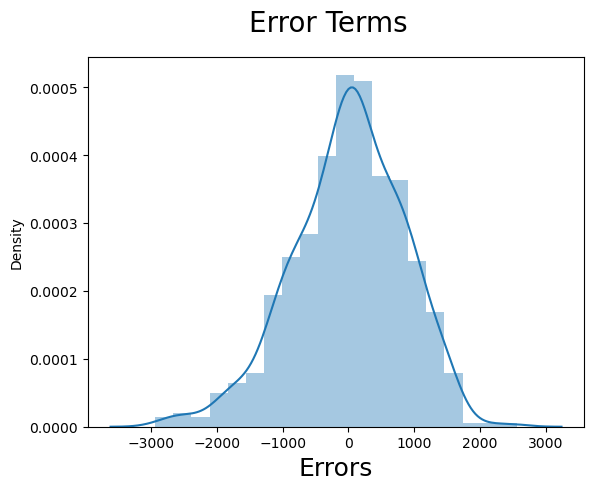

In [90]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### ___Step 5 : Making Predictions___

#### ___Step 5.1 : Scaling and transforming the Numerical Values in Test DataFrame___

In [93]:
num_columns

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [94]:
# Transforming the numerical values in the test dataframe.

df_test[num_columns] = scaler.transform(df_test[num_columns])
df_test.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,season_3,season_4,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.933557,0.427086,0.692706,...,1,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.265163,0.767976,0.712034,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.072539,0.346376,0.303382,...,0,1,0,0,0,1,0,0,1,0


#### ___Step 5.1 : Spliting data Set into Train Test Split___

In [96]:
y_test = df_test.pop('cnt')
X_test = df_test

In [97]:
y_test.head(3)

184    0.692706
535    0.712034
299    0.303382
Name: cnt, dtype: float64

#### ___Step 5.2 : Let's use our model to make predictions.___

In [99]:
# Adding Constant
X_test_sm = sm.add_constant(X_test)

In [100]:

X_train_rfe_col = X_train_rfe.columns.tolist()

In [101]:
X_test_sm = X_test_sm[X_train_rfe_col]

In [102]:
y_test_pred = lr.predict(X_test_sm)

In [103]:
y_test_pred

184   -1521.150104
535    2247.100868
299     328.942136
221     343.325163
152     181.289197
          ...     
400    2012.378827
702    2042.655198
127     163.050451
640    2404.475074
72      310.518089
Length: 219, dtype: float64

Text(0, 0.5, 'y_pred')

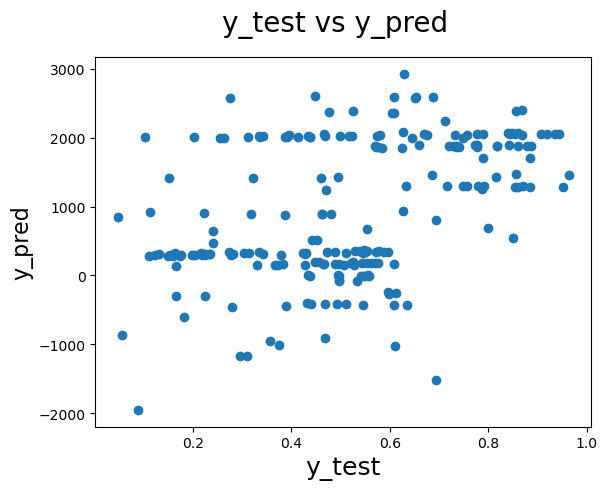

In [104]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [105]:
# Evaluate the model
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_test_pred)

-39110599.41322935

In [174]:
scaler = MinMaxScaler()
y_test_pred = scaler.fit_transform(y_test_pred.values.reshape(-1, 1)).flatten()

# Calculate R² score
r2_score(y_true = y_test, y_pred = y_test_pred)


-0.1468069339426672